# Import Necessary Libraries

In [8]:
import pandas

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read The Diabetic retinopathy dataset

In [10]:
data = pandas.read_csv(r'pronostico_dataset.csv',sep=';')
data.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [11]:
data.shape

(6000, 6)

In [12]:
data.columns

Index(['ID', 'age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [13]:
df=data.drop('ID' ,axis=1)
df

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy


# Checking for null values

In [14]:
data.isna().sum()

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

# Checking for dublicate values

In [15]:
duplicate=data.duplicated()
print(duplicate.sum())
data[duplicate]

0


,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis


In [16]:
# calculating some statistical data
data.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,60.464121,100.694822,90.505547,100.628255
std,1732.195139,8.564392,10.669267,9.648200,10.433915
min,0.000000,35.164761,69.675429,62.807105,69.967453
25%,1499.750000,54.371941,93.267420,83.641788,93.202373
50%,2999.500000,59.831159,100.119926,89.912429,100.060637
75%,4499.250000,65.809652,107.439501,96.682405,107.250829
max,5999.000000,103.279497,151.699660,133.456382,148.233544


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [18]:
data['prognosis'].value_counts()

retinopathy       3087
no_retinopathy    2913
Name: prognosis, dtype: int64

In [19]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='age', ylabel='Density'>

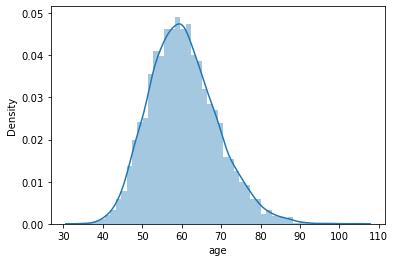

In [20]:
sns.distplot(data['age'])

<AxesSubplot:xlabel='systolic_bp', ylabel='Density'>

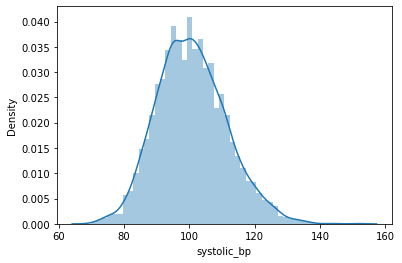

In [21]:
sns.distplot(data['systolic_bp'])

<AxesSubplot:xlabel='diastolic_bp', ylabel='Density'>

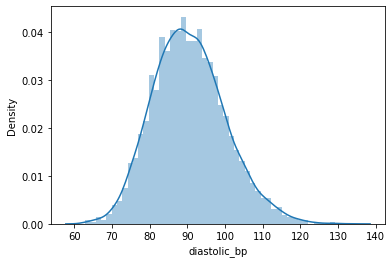

In [22]:
sns.distplot(data['diastolic_bp'])

<AxesSubplot:xlabel='cholesterol', ylabel='Density'>

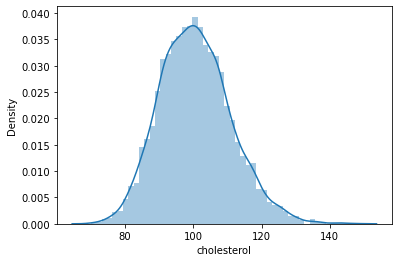

In [23]:
sns.distplot(data['cholesterol'])

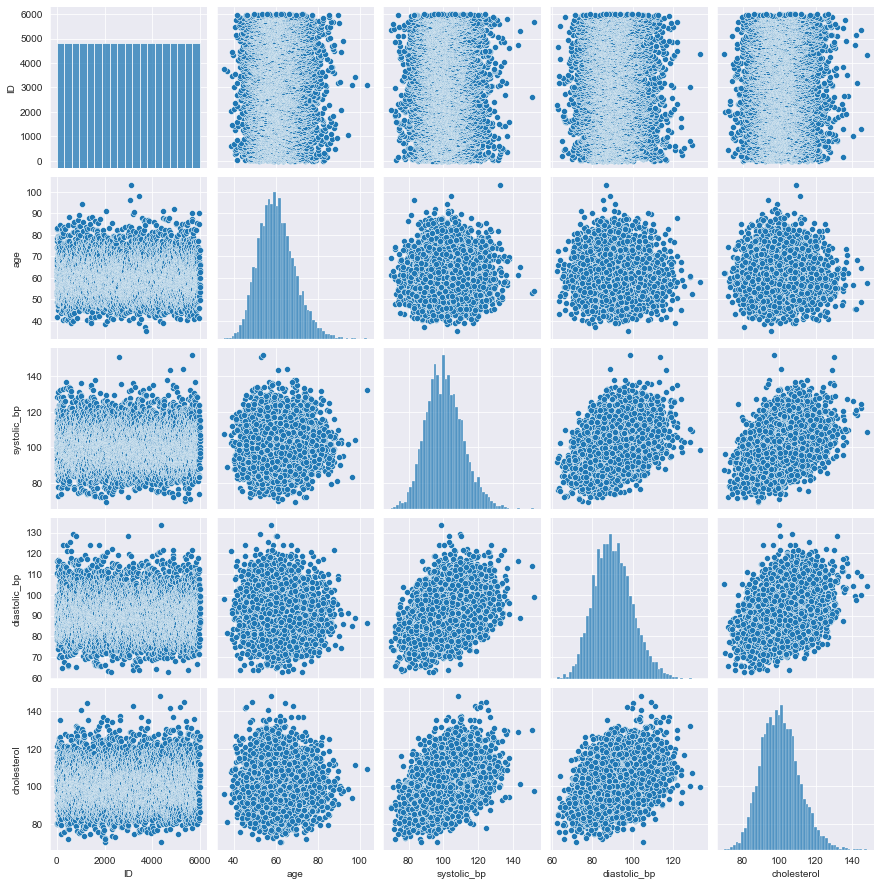

In [24]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

# How independent variable s are related to each other

In [25]:
data.corr()

,ID,age,systolic_bp,diastolic_bp,cholesterol
ID,1.000000,0.011357,-0.021189,-0.022656,0.010583
age,0.011357,1.000000,0.010361,-0.005410,-0.006972
systolic_bp,-0.021189,0.010361,1.000000,0.405406,0.406029
diastolic_bp,-0.022656,-0.005410,0.405406,1.000000,0.398345
cholesterol,0.010583,-0.006972,0.406029,0.398345,1.000000


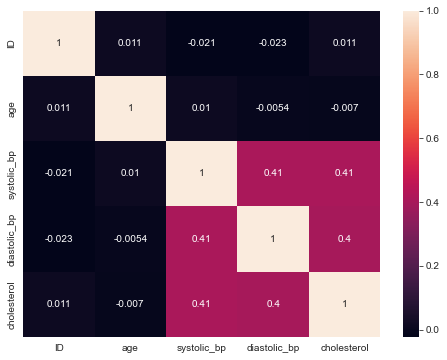

In [26]:
#Relation between the dependent variables
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Checking outliers in the data

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5d19fce20>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5d1a0d580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5d19fca90>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5d1a0dcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5d1a1d0a0>],
 'means': []}

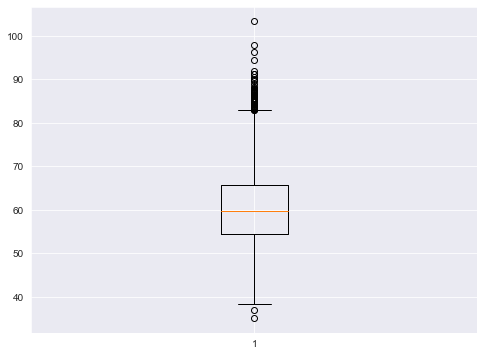

In [27]:
plt.figure(figsize=(8,6))
plt.boxplot(df.age)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5d1a6bf40>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5d1a776d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5d1a6bbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5d1a77df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5d1a851c0>],
 'means': []}

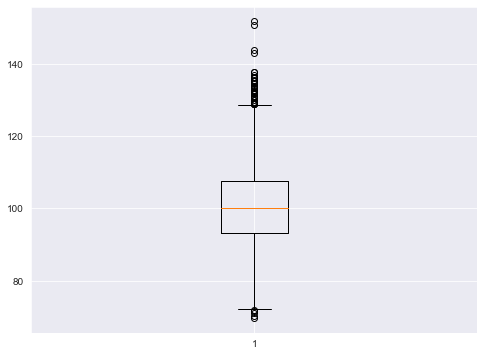

In [28]:
plt.figure(figsize=(8,6))
plt.boxplot(df.systolic_bp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5d1acffd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5d1ade730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5d1acfc40>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5d1adee50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5d1ae9220>],
 'means': []}

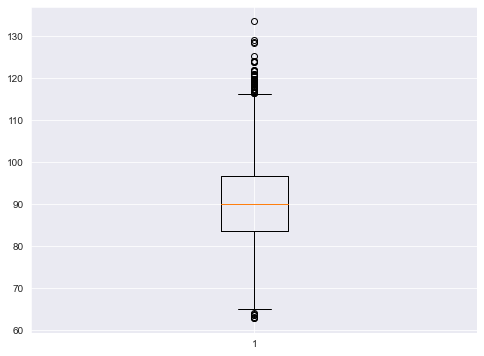

In [29]:
plt.figure(figsize=(8,6))
plt.boxplot(df.diastolic_bp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5d1b40820>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5d1b40f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5d1b40490>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5d1b4f6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5d1b4fa30>],
 'means': []}

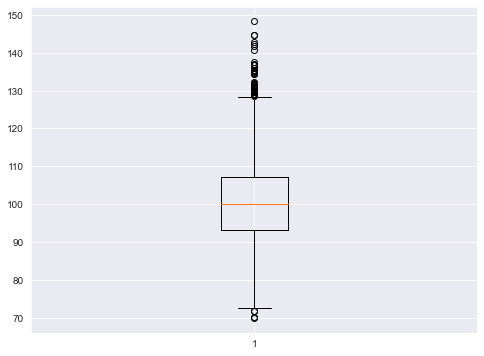

In [30]:
plt.figure(figsize=(8,6))
plt.boxplot(df.cholesterol)

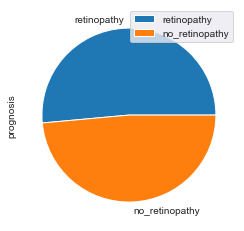

In [31]:
data = pandas.read_csv(r'pronostico_dataset.csv',sep=';')

tags  =data['prognosis'].value_counts().plot.pie()
plt.legend()
plt.show()

In [32]:
max_threshold = df['age'].quantile(0.95)
max_threshold 

75.69798165497495

In [33]:
df[df['age']>max_threshold]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy
24,82.979636,100.211368,86.173067,97.026684,retinopathy
43,79.283240,120.431278,96.931077,113.362147,retinopathy
...,...,...,...,...,...
5894,85.331533,94.221222,106.305896,111.711281,retinopathy
5912,77.190059,122.033728,96.976389,96.932767,retinopathy
5945,77.177492,103.792513,103.292389,106.963914,retinopathy
5959,89.839618,102.447308,107.572729,107.965425,retinopathy


In [34]:
min_threshold = df['age'].quantile(0.05)
min_threshold 

47.53431116454367

In [35]:
df[df['age']<min_threshold]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
20,41.663762,113.817344,116.311952,117.852312,retinopathy
33,45.212502,99.950220,99.482600,93.673703,no_retinopathy
42,47.020876,89.969258,93.230553,94.975529,no_retinopathy
63,46.886639,111.377785,81.360177,106.035832,no_retinopathy
183,43.672366,110.356618,95.729856,89.270943,no_retinopathy
...,...,...,...,...,...
5917,45.793877,103.531815,97.249127,111.495400,retinopathy
5926,45.687871,112.704173,101.643490,111.879075,no_retinopathy
5971,45.909980,101.486258,96.636799,104.862586,retinopathy
5982,46.095483,83.212077,71.514593,91.127603,no_retinopathy


In [36]:
max_threshold = df['systolic_bp'].quantile(0.95)
max_threshold

119.5143437336334

In [37]:
min_threshold = df['systolic_bp'].quantile(0.05)
min_threshold

84.49649767322636

In [38]:
df[(df['age']<max_threshold) & (df['age']>min_threshold)]             # removing outliers

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
465,84.688583,100.999339,88.130268,99.921832,retinopathy
494,88.192280,105.019242,96.770507,102.213642,retinopathy
734,85.720112,86.719560,80.937096,89.389789,retinopathy
898,86.919000,98.832910,91.423936,111.608300,retinopathy
943,88.991259,81.420801,95.767988,104.277551,retinopathy
1054,94.381111,101.794209,91.183143,98.603710,retinopathy
1114,86.078039,101.866919,89.819976,89.848165,retinopathy
1351,87.523454,91.807235,84.977094,98.335758,retinopathy
1408,85.159012,101.896000,83.121610,84.446310,retinopathy
1488,87.995287,106.801490,76.017583,112.057964,retinopathy


In [39]:
max_threshold = df['systolic_bp'].quantile(0.95)
max_threshold 

119.5143437336334

In [40]:
df[df['systolic_bp']>max_threshold]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
5,52.181782,121.080264,110.488129,115.468279,retinopathy
26,60.393501,128.401194,85.781436,100.327671,retinopathy
27,58.416829,119.708281,95.552457,103.413662,retinopathy
41,48.983566,131.120992,92.913213,105.666027,retinopathy
43,79.283240,120.431278,96.931077,113.362147,retinopathy
...,...,...,...,...,...
5938,55.734851,122.868823,94.937569,107.608815,retinopathy
5947,59.842217,123.840824,103.632674,124.891165,retinopathy
5960,69.546501,121.058978,93.968260,105.113887,retinopathy
5970,85.180507,120.106129,92.605936,125.065534,retinopathy


In [41]:
min_threshold = df['systolic_bp'].quantile(0.05)
min_threshold 

84.49649767322636

In [42]:
df[df['systolic_bp']<min_threshold]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
54,59.758924,72.857628,80.758372,90.853284,no_retinopathy
59,56.969976,81.868201,89.629376,84.106811,no_retinopathy
64,61.540233,77.966531,89.222213,103.383342,no_retinopathy
65,56.653133,84.367521,73.862515,93.378666,no_retinopathy
84,74.213941,82.692096,76.444660,82.389656,retinopathy
...,...,...,...,...,...
5954,51.366815,84.000324,84.900624,89.573149,no_retinopathy
5956,61.793098,83.652859,75.365242,81.886254,no_retinopathy
5964,58.616797,73.946397,90.675484,100.268686,no_retinopathy
5976,62.038162,83.230578,77.101042,91.420343,no_retinopathy


In [43]:
df[(df['systolic_bp']<max_threshold) & (df['systolic_bp']>min_threshold)]                     #removing outliers

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [44]:
max_threshold = df['diastolic_bp'].quantile(0.95)
max_threshold 

107.26896605410955

In [45]:
df[df['diastolic_bp']>max_threshold]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
2,69.003986,111.349455,109.850616,100.828246,retinopathy
5,52.181782,121.080264,110.488129,115.468279,retinopathy
20,41.663762,113.817344,116.311952,117.852312,retinopathy
35,61.355212,97.823657,116.639356,111.179809,retinopathy
38,56.770235,109.879765,113.145434,122.884568,retinopathy
...,...,...,...,...,...
5930,53.933772,101.136214,117.908153,103.203283,retinopathy
5942,55.975285,102.942324,110.625024,112.869528,no_retinopathy
5959,89.839618,102.447308,107.572729,107.965425,retinopathy
5962,51.347285,94.794045,111.422888,100.431867,retinopathy


In [46]:
min_threshold = df['diastolic_bp'].quantile(0.05)
min_threshold 

75.5943981108769

In [47]:
df[df['diastolic_bp']<min_threshold]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
39,57.463988,89.165719,75.133410,88.763336,no_retinopathy
40,51.653155,88.904783,73.775536,80.600527,no_retinopathy
65,56.653133,84.367521,73.862515,93.378666,no_retinopathy
93,68.983299,103.298410,69.875241,87.871841,retinopathy
146,52.664489,94.636368,70.971584,86.965182,no_retinopathy
...,...,...,...,...,...
5880,46.687872,82.921711,72.986624,85.048789,no_retinopathy
5944,64.195049,92.966917,71.673086,103.692527,retinopathy
5952,57.370971,96.044268,74.999310,101.506599,no_retinopathy
5956,61.793098,83.652859,75.365242,81.886254,no_retinopathy


In [48]:
df[(df['diastolic_bp']<max_threshold) & (df['diastolic_bp']>min_threshold)] 

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy
6,68.722144,115.232290,92.730813,106.784960,retinopathy
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [49]:
max_threshold = df['cholesterol'].quantile(0.95)
max_threshold

118.5943405226147

In [50]:
df[df['cholesterol']>max_threshold]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
9,63.624683,96.341053,80.919213,121.558605,retinopathy
38,56.770235,109.879765,113.145434,122.884568,retinopathy
83,48.176973,104.867207,93.098902,120.671952,retinopathy
94,63.133659,102.641854,83.633597,125.468658,retinopathy
109,74.131955,121.924803,99.148085,123.903001,retinopathy
...,...,...,...,...,...
5923,59.094537,111.082339,86.955857,125.159586,retinopathy
5947,59.842217,123.840824,103.632674,124.891165,retinopathy
5970,85.180507,120.106129,92.605936,125.065534,retinopathy
5992,72.708129,115.105489,99.500383,126.590583,retinopathy


In [51]:
min_threshold = df['cholesterol'].quantile(0.05)
min_threshold 

84.53841318286439

In [52]:
df[df['cholesterol']<min_threshold]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
23,53.964207,106.745295,86.001569,80.568508,no_retinopathy
40,51.653155,88.904783,73.775536,80.600527,no_retinopathy
59,56.969976,81.868201,89.629376,84.106811,no_retinopathy
82,64.127146,103.848096,92.467352,84.169538,no_retinopathy
...,...,...,...,...,...
5865,62.548786,100.770205,105.273074,79.812699,retinopathy
5882,64.740674,108.421639,82.556239,84.287230,retinopathy
5890,54.692916,92.200429,94.873587,83.388793,no_retinopathy
5956,61.793098,83.652859,75.365242,81.886254,no_retinopathy


In [53]:
df[(df['cholesterol']<max_threshold) & (df['cholesterol']>min_threshold)] 

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy
5,52.181782,121.080264,110.488129,115.468279,retinopathy
...,...,...,...,...,...
5994,56.603050,105.062208,91.448914,111.989797,no_retinopathy
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy


# Converting categorical value into numerical value for dependent feature 'prognosis'

In [54]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [55]:
for i in data.prognosis:
    df.prognosis=label_encoder.fit_transform(df.prognosis)
df.head()    

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1


# Scaling of Data

In [56]:
from sklearn.preprocessing import StandardScaler

scaled_df = StandardScaler().fit_transform(df.iloc[:,:4])

In [57]:
scaled_df=pd.DataFrame(scaled_df)
scaled_df=scaled_df.rename(columns={0 :'Age' ,1:'Systolic_bp' ,2:'Diastolic_bp' , 3:'Cholesterol' })

In [58]:
scaled_df['prognosis']=df["prognosis"]

In [59]:
scaled_df


,Age,Systolic_bp,Diastolic_bp,Cholesterol,prognosis
0,1.953859,-1.444088,-1.086684,-1.981315,1
1,0.357992,-0.123270,-0.585981,0.934929,1
2,0.997219,0.998712,2.005212,0.019169,1
3,2.589318,-0.528543,-1.123484,-1.299904,1
4,2.088141,0.792976,0.021526,-0.777959,1
...,...,...,...,...,...
5995,-1.267244,-0.547148,-0.403205,0.672453,0
5996,0.307761,-0.061424,0.311964,0.416288,1
5997,-0.572403,-0.213095,1.263795,1.940727,1
5998,0.350881,0.573139,-0.253428,0.519882,1


# MODEL BUILDING

In [60]:
X = scaled_df.drop(['prognosis'],axis=1)

In [61]:
X

,Age,Systolic_bp,Diastolic_bp,Cholesterol
0,1.953859,-1.444088,-1.086684,-1.981315
1,0.357992,-0.123270,-0.585981,0.934929
2,0.997219,0.998712,2.005212,0.019169
3,2.589318,-0.528543,-1.123484,-1.299904
4,2.088141,0.792976,0.021526,-0.777959
...,...,...,...,...
5995,-1.267244,-0.547148,-0.403205,0.672453
5996,0.307761,-0.061424,0.311964,0.416288
5997,-0.572403,-0.213095,1.263795,1.940727
5998,0.350881,0.573139,-0.253428,0.519882


In [62]:
y = scaled_df['prognosis']

In [63]:
y=pd.DataFrame(data=y)

In [64]:
y

,prognosis
0,1
1,1
2,1
3,1
4,1
...,...
5995,0
5996,1
5997,1
5998,1


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.20,random_state=123 , shuffle=True)

In [66]:
X_train.shape,y_train.shape  

((4800, 4), (4800, 1))

In [67]:
X_test.shape,y_test.shape

((1200, 4), (1200, 1))

# LOGISTIC REGRESSION

In [68]:
# create an object of the LinearRegression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [69]:
# fit the model with the training data
model.fit(X_train, y_train)
# making the predictions
predict_train = model.predict(X_train)
predict_test  = model.predict(X_test)


In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [71]:
# Getting the confusion matrix
confusion_matrix = confusion_matrix(y_test, predict_test)
print(confusion_matrix)
# getting the classification report
 
report = classification_report(y_test, predict_test)
print(report)

[[414 172]
 [155 459]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       586
           1       0.73      0.75      0.74       614

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200



In [72]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, predict_train))
print(accuracy_score(y_test, predict_test))

0.7504166666666666
0.7275


In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [74]:
#ROC Curve for the model
ns_probs = [0 for _ in range(len(y_test))]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.805


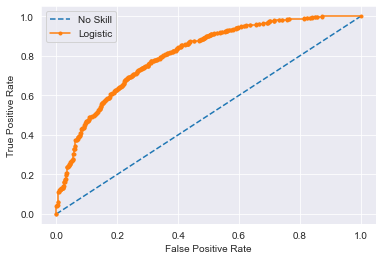

In [75]:
### predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier


In [77]:
# Splitting data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [78]:
model=DecisionTreeClassifier(criterion ='entropy',max_depth=3)

In [79]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [80]:

preds  = model.predict(X_test)

In [81]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       593
           1       0.70      0.71      0.71       607

    accuracy                           0.70      1200
   macro avg       0.70      0.70      0.70      1200
weighted avg       0.70      0.70      0.70      1200



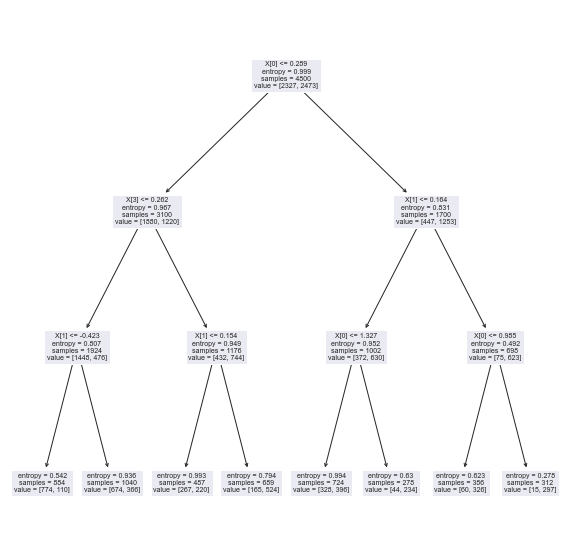

In [82]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(decision_tree = model)
plt.show()

# XGBoost model

In [83]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [84]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [85]:

#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

In [86]:
#train XGBoost model
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

#calculate and print scores for the model 
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

XGB accuracy score for train: 0.876: test: 0.736


In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [88]:
# Getting the confusion matrix
confusion_matrix = confusion_matrix(y_train, y_train_preds)
print(confusion_matrix)
# getting the classification report
 
report = classification_report(y_train, y_train_preds)
print(report)

[[1757  283]
 [ 238 1922]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2040
           1       0.87      0.89      0.88      2160

    accuracy                           0.88      4200
   macro avg       0.88      0.88      0.88      4200
weighted avg       0.88      0.88      0.88      4200



# GradientBoostingClassifier


In [89]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier


In [90]:
from sklearn.ensemble import GradientBoostingClassifier
#train GBoost model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=1, random_state=0)
                                       
gb.fit(X_train,y_train.squeeze().values)

#calculate and print scores for the model for top 15 features
y_train_preds = gb.predict(X_train)
y_test_preds = gb.predict(X_test)

print('GB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

GB accuracy score for train: 0.762: test: 0.733


In [91]:
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       873
           1       0.74      0.74      0.74       927

    accuracy                           0.73      1800
   macro avg       0.73      0.73      0.73      1800
weighted avg       0.73      0.73      0.73      1800



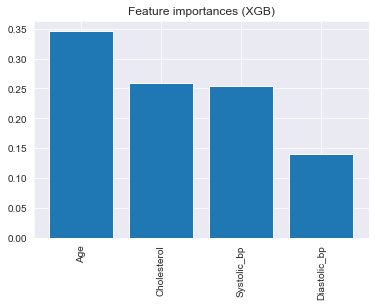

In [92]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_),key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [93]:
from sklearn import metrics

Accuracy: 0.7316666666666667
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.805


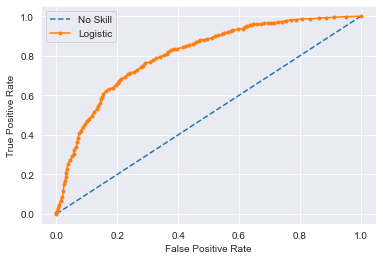

In [94]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
clf.fit(X_train,y_train)
RF_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, RF_pred))
#ROC Curve 
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Grid Search Using SVM

In [95]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC  

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [97]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [98]:
predictions = svc_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[429 172]
 [122 477]]


In [99]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       601
           1       0.73      0.80      0.76       599

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.75      1200
weighted avg       0.76      0.76      0.75      1200



In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

In [102]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.6s
[CV] END .....................................C=0.1, gamma=1; total time=   0.6s
[CV] END .....................................C=0.1, gamma=1; total time=   0.6s
[CV] END .....................................C=0.1, gamma=1; total time=   0.6s
[CV] END .....................................C=0.1, gamma=1; total time=   0.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.5s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.6s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [103]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1}

In [104]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=0.1)


In [105]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[430 171]
 [129 470]]


In [106]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       601
           1       0.73      0.78      0.76       599

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



# KNN
Model fitting with K-cross Validation and GridSearchCV

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [107]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [108]:
print(grid_search.best_params_)

{'n_neighbors': 30}


In [109]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 73.94%


In [110]:
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X, y)

y_test_hat=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 77.08%


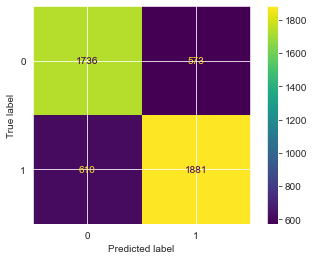

In [111]:
plot_confusion_matrix(grid,X_train, y_train,values_format='d' )

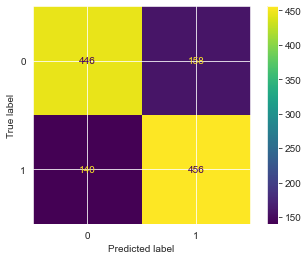

In [112]:
plot_confusion_matrix(grid,X_test, y_test,values_format='d' )

# Naive Bayes classifier

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
model = GaussianNB()

In [115]:
model.fit(X_train, y_train)

GaussianNB()

In [116]:
#calculate and print scores for the model 
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)



In [117]:
print('Naive Bayes accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

Naive Bayes accuracy score for train: 0.734: test: 0.745


In [118]:
# Getting the confusion matrix
confusion_matrix = confusion_matrix(y_train, y_train_preds)
print(confusion_matrix)
# getting the classification report
 
report = classification_report(y_train, y_train_preds)
print(report)

[[1748  561]
 [ 715 1776]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      2309
           1       0.76      0.71      0.74      2491

    accuracy                           0.73      4800
   macro avg       0.73      0.74      0.73      4800
weighted avg       0.74      0.73      0.73      4800



# TRAIN TEST SPLIT

In [119]:
# Splitting data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4800, 4)
(1200, 4)
(4800, 1)
(1200, 1)


In [120]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []

models.append(("Logistic Regression:",LogisticRegression()))

models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))

models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Models appended...')

Models appended...


In [121]:
import warnings
warnings.filterwarnings('ignore')

# Training accuracy for all the models

In [122]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=123 ,shuffle = True)
    cv_result = cross_val_score(model,X_train,y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 74.08333333333333
K-Nearest Neighbour: 69.4375
Decision Tree: 65.89583333333333
Support Vector Machine-linear: 74.12500000000001
Support Vector Machine-rbf: 74.75
Random Forest: 70.54166666666667
AdaBoostClassifier: 73.29166666666666
GradientBoostingClassifier: 74.41666666666667


# Testing accuracy for all Models

In [123]:
test_results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=123 ,shuffle = True)
    cv_result = cross_val_score(model,X_test,y_test, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 74.08333333333333
K-Nearest Neighbour: 69.4375
Decision Tree: 65.89583333333333
Support Vector Machine-linear: 74.12500000000001
Support Vector Machine-rbf: 74.75
Random Forest: 70.54166666666667
AdaBoostClassifier: 73.29166666666666
GradientBoostingClassifier: 74.41666666666667


# xgb boosting algorithem accuracy:
    XGB accuracy score for train: 0.876: test: 0.736

# Using TPOT CLASSIFIER

In [124]:
pip install tpot

Note: you may need to restart the kernel to use updated packages.


In [125]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [127]:
import xgboost

In [128]:
#train XGBoost model
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

XGB accuracy score for train: 0.876: test: 0.736


In [129]:
from tpot import TPOTClassifier

pipeline_optimizer = TPOTClassifier(
    scoring='accuracy',
    max_time_mins=10,
    random_state=42,
    verbosity=2
)

pipeline_optimizer.fit(X_train, y_train_preds)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8747619047619046


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: MLPClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=10, max_features=0.9500000000000001, min_samples_leaf=18, min_samples_split=12, n_estimators=100, subsample=1.0), alpha=0.001, learning_rate_init=1.0)


TPOTClassifier(max_time_mins=10, random_state=42, scoring='accuracy',
               verbosity=2)

In [130]:
pipeline_optimizer.score(X_test, y_test)

0.7377777777777778

In [131]:
tpot_preds = pipeline_optimizer.predict(X_test)

from sklearn.metrics import accuracy_score

print(f'Baseline model accuracy: {accuracy_score(y_test, y_test_preds)}')
print(f'TPOT model accuracy: {accuracy_score(y_test, tpot_preds)}')

Baseline model accuracy: 0.7355555555555555
TPOT model accuracy: 0.7377777777777778


In [132]:
from tpot import TPOTClassifier

pipeline_optimizer = TPOTClassifier(
    scoring='accuracy',
    max_time_mins=10,
    random_state=42,
    verbosity=2
)

pipeline_optimizer.fit(X_test, y_test_preds)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.5, min_samples_leaf=5, min_samples_split=12, n_estimators=100)


TPOTClassifier(max_time_mins=10, random_state=42, scoring='accuracy',
               verbosity=2)

In [133]:
pipeline_optimizer.fitted_pipeline_

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_features=0.5,
                                        min_samples_leaf=5,
                                        min_samples_split=12,
                                        random_state=42))])

In [134]:
pipeline_optimizer.export('pronostico_retinopathy_pipeline.py')

modeling using tpotclassisier

In [135]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop(['prognosis'],axis=1)
y = scaled_df['prognosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

y_train.shape, y_test.shape

((4500,), (1500,))

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

lm_preds = model.predict(X_test)
print(confusion_matrix(y_test, lm_preds))

[[548 182]
 [188 582]]


In [137]:
from sklearn.metrics import f1_score

print(f1_score(y_test, lm_preds))

0.758800521512386


In [138]:
from tpot import TPOTClassifier

pipeline_optimizer = TPOTClassifier(
    scoring='f1',
    max_time_mins=10,
    random_state=42,
    verbosity=2
)

pipeline_optimizer.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)


TPOTClassifier(max_time_mins=10, random_state=42, scoring='f1', verbosity=2)

In [139]:
pipeline_optimizer.score(X_test, y_test)

0.7597195666029318

In [140]:
tpot_preds = pipeline_optimizer.predict(X_test)

from sklearn.metrics import accuracy_score

print(f'Baseline model accuracy: {accuracy_score(y_test, lm_preds)}')
print(f'TPOT model accuracy: {accuracy_score(y_test, tpot_preds)}')

Baseline model accuracy: 0.7533333333333333
TPOT model accuracy: 0.7486666666666667


In [141]:
pipeline_optimizer.fitted_pipeline_

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.001, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=9, max_leaves=0, min_child_weight=7,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=1, num_parallel_tree=1,
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=1, ...))])

In [107]:
# Creating a sav file
import pickle
filename = 'model.sav'
pickle.dump(svc_model ,open(filename, 'wb'))